# Efficacité d'une Mixed Matrice Membrane MMM pour la dialyse

### Etude du transfert en diffusion pure
En considérant le seul transfert par diffusion à travers la membrane, exprimer puis calculer la densité de flux et le flux (en g/h) de diffusion d’urée et de créatine  pour une dans le sang de 3g/L et de 100 mg/L en urée et en toxine

### Etude du transfert en régime diffusion + adsorption
Une membrane MMM contient des adsorbants. Ces adsorbants, dispersés finement dans la membrane, représentent une surface d’adsorption caractérisée par une surface spécifique, a, représentant la surface active par unité de volume de la membrane. L’adsorption peut être décrite par une réaction hétérogène d’ordre 1.

Calculer le flux de matière de toxine en kg/(m2s) et en g/h qui sera extrait du compartiment sang. Chiffrer le gain par rapport à une membrane opérant par diffusion seule (voir diapo précédente).

Calculer la concentration en toxine présente à la moitié de l’épaisseur de la membrane. 

Conclure sur l’intérêt d’intégrer les adsorbants sur toute l’épaisseur de la membrane. 


### Données :
- Surface du rein artificiel 0,6 m2
- Coefficient de diffusion de l’urée dans la membrane (classique ou MMM) : Du=4 10-11 m2 /s 
- Coefficient de diffusion de la toxine dans la membrane (classique ou MMM) : Dt=2 10-12 m2 /s 
- Epaisseur de la membrane de dialyse : e=50 micromètres 
- Surface spécifique des adsorbants dans la MMM : a=10 m2 /m3 
- Constante de vitesse de la réaction d’adsorption assimilée à une réaction hétérogène d’ordre 1 : k*R=0,01 m/s 



In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Données opératoires
cu=3      #g/L ou kg/m3
ct=0.1    #g/L ou kg/m3
# Données membrane
Du=4e-11  #m2s-1
Dt=2e-12  #m2s-1
e=50e-6   #m
S=0.6     #m2

#Calcul des densité de flux (hypothèse concentration nulle dans le dialysat : 
#                            le débit de dialysat doit être suffisant)
ju=(Du/e)*cu
jt=(Dt/e)*ct
print ('La densité de flux de matière d urée est de    {0:e}'.format(ju),' kg m-2 s-1')
print ('La densité de flux de matière de toxine est de {0:e}'.format(jt),' kg m-2 s-1')

#Calcul des flux en g/h
Ju=ju*S*1000*3600
Jt=jt*S*1000*3600
print ('Le flux de matière d urée est de               {0:f}'.format(Ju),' g/h')
print ('Le flux de matière de toxine est de            {0:f}'.format(Jt),' g/h')

La densité de flux de matière d urée est de    2.400000e-06  kg m-2 s-1
La densité de flux de matière de toxine est de 4.000000e-09  kg m-2 s-1
Le flux de matière d urée est de               5.184000  g/h
Le flux de matière de toxine est de            0.008640  g/h


# Etude du transfert en régime diffusion + adsorption

Lors de la dialyse à travers une Mixed Matrice Membrane il y a un transport diffusif des espèces mais également une réaction d'adorption. Le profil de concentration n'est donc plus linéaire comme en diffusion pure. Pour déterminer le profil de concentration, il est nécessaire de résoudre l'équation de continuité dans un élément de volume dans la membrane :

$\frac{\partial c}{\partial t}=- \mathbf{\nabla} \cdot \mathbf{j} \pm s$

Pour les hypothèses suivantes :
- régime permanent
- coordonnée rectigne dans une direction x
- terme source $s=a k^*_R c$
- flux de matière diffusif $j=-D \nabla c=-D \frac{\partial c}{\partial x}$

Il faut résoudre l'équation différentielle :

$D\frac{\partial^2 c}{\partial x^2} -a k^*_R c=0$

Avec les conditions limites :

$x=0$   $c=c_b$

$x=e$   $c=c_d=0$

La solution générale de cette équation est :

$c=K_1 ch{\varphi\frac{x}{e}} + K_22 ch{\varphi\frac{x}{e}}$

en définissant un nombre sans dimension appelé [nombre de Thiele](https://fr.wikipedia.org/wiki/Nombre_de_Thiele) :

$\varphi=\sqrt{\frac{ak_R^\ast}{D}}e $

Les conditions limites permettent de déterminer les constantes :

$c_b=K_1$

$0=K_1 ch\left(\varphi\right)+K_2 sh\left(\varphi\right)$

$K_2=-\frac{c_b}{th(\varphi)}$

Le profil de concentration s'écrit alors :

$\frac{c}{c_b}=ch{\left(\varphi\frac{x}{e}\right)}-\frac{sh(\varphi\frac{x}{e})}{th(\varphi)}$

Ce profil permet de déduire les flux de matière côté sang et dialysat :

$\left.\ j\right|_{x=0}=\frac{D}{e}\frac{\varphi}{th(\varphi)}c_b$

$\left.\ j\right|_{x=e}=\frac{D}{e}\frac{\varphi}{sh(\varphi)}c_b$


Le nombre de Thiele est de 11.180340
Puisque le nombre est très supérieur à 1 le régime est limité par la diffusion
Le flux de matière est multiplié par 11.180340 par rapport à un flux purement diffusif
Le flux de matière entrant dans la membrane (et donc enlevé deu sang) est de 96.598137 mg/h
Le flux de matière sortant de la membrane (arrivant dans le dialysat) est de 0.002694 mg/h


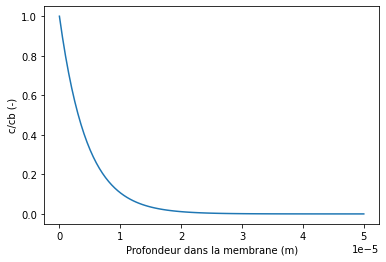

c/cb à mi-membrane est 0.003734


In [36]:
#Calcul du module de Thiele

#Données charbon actif
a=10    #m2 m-3
kR=0.01 #m s-1

Phi=np.sqrt(a*kR/Dt)*e
print ('Le nombre de Thiele est de {0:f}'.format(Phi))
print ('Puisque le nombre est très supérieur à 1 le régime est limité par la diffusion')

print ('Le flux de matière est multiplié par {0:f} par rapport à un flux purement diffusif'.format(Phi/np.tanh(Phi)))

#Calcul des flux en mg/h
Je=S*(Dt/e)*(Phi/np.tanh(Phi))*ct*1000*3600*1000
Js=S*(Dt/e)*(Phi/np.sinh(Phi))*ct*1000*3600*1000
print ('Le flux de matière entrant dans la membrane (et donc enlevé deu sang) est de {0:f} mg/h'.format(Je))
print ('Le flux de matière sortant de la membrane (arrivant dans le dialysat) est de {0:f} mg/h'.format(Js))

x=np.linspace(0,e,100)
#Calcul du rapport c/cb
c=np.cosh(Phi*x/e)-np.sinh(Phi*x/e)/np.tanh(Phi)

plt.plot(x,c)
plt.xlabel('Profondeur dans la membrane (m)')
plt.ylabel('c/cb (-)')
plt.show()

#Calcul de la concentration à mi épaisseur
c2=np.cosh(Phi/2)-np.sinh(Phi/2)/np.tanh(Phi)
print ('c/cb à mi-membrane est {0:f}'.format(c2))


La quantité d'absorbant permet de réduire de façon importante la teneur en toxine. Il pourrait être possible de réduire la teneur en absorbant. 